# Data Description : 
1. battery Power
2. Bluetooth
3. speed of microprocessor
5. front camera PXs
6. has 4G or not
8. mobile depth in cms
10. no. of cores of processor
11. primary Camera PXs
12. Pixel resolutions height
13. Pixel resolutions width
15. screen height mobile in cms
16. screen width mobile in cms
17. longest time that a single battery chagre will last when you are
18. has 3g or not
21. dependent variable : 0 = low price, 1 = medium, 2 = high, 3 = very high

In [1]:
import pandas as pd
import numpy as np

import os as os
import warnings
warnings.filterwarnings("ignore")
#visuals
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency
# to split data
from sklearn.model_selection import train_test_split
#model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#tesing model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
def Accuracy_confusion(model):
    #predicted on train data
    X_train_op  = X_train.copy()
    X_train_op["y_train_actuals"] = y_train["price_range"]
    X_train_op["y_train_predict"] = model.predict(X_train)
    
    #predicted on test data
    X_test_op  = X_test.copy()
    X_test_op["y_test_actuals"] = y_test["price_range"]
    X_test_op["y_test_predict"] = model.predict(X_test)
    
    # accuracy on train data
    train_acc = accuracy_score(X_train_op["y_train_actuals"], X_train_op["y_train_predict"]) * 100 
    print("Accuracy on train data", train_acc)
    
     # accuracy on test data
    test_acc = accuracy_score(X_test_op["y_test_actuals"], X_test_op["y_test_predict"]) * 100
    print("Accuracy on test data", test_acc)
    
    #confusion matrix
    cnf_matrix = confusion_matrix(X_train_op["y_train_actuals"], X_train_op["y_train_predict"])
    sns.heatmap(cnf_matrix, annot=True, cmap = "YlGnBu", fmt = "0.3g")
    plt.xlabel("Predictions", fontsize=15)
    plt.ylabel("Actuals", fontsize=15)
    plt.title("Confusion matrix", fontsize=15)
    plt.show()
    
    return train_acc, test_acc
    

In [3]:
filepath = r"C:\Users\user\Downloads\Dataset"
filename = "Mobile_train.csv"
df = pd.read_csv(os.path.join(filepath,filename), encoding = "unicode escape")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# Insights : 
It shows, variables are Continuous or Categorical.<br>
here : Categorical variables: total = 8 : blue, Dual_sim, four_g, m_dep, n_cores, three_g, touch_screen, wifi, price_range.


In [6]:
df.shape

(2000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Univariate Analysis

In [10]:
def plot(x  , indata):
    fig, axes=plt.subplots(1,2, figsize=(15,5))
    sns.distplot(df[x], ax=axes[0], kde=False)
    sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True)
    fig.suptitle("Univariate Analysis of " +x, fontsize=15)
    plt.show()

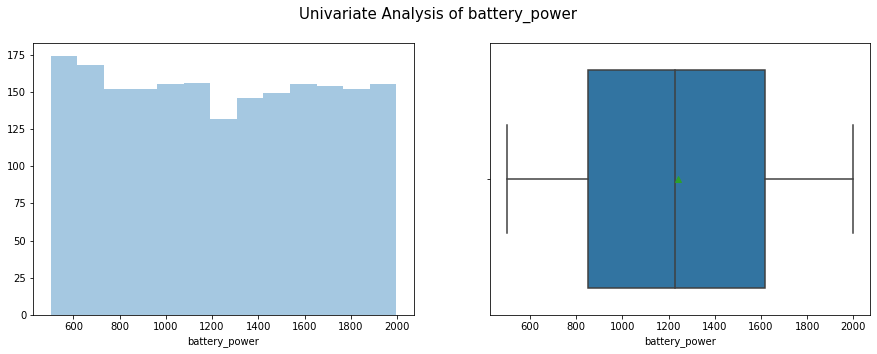

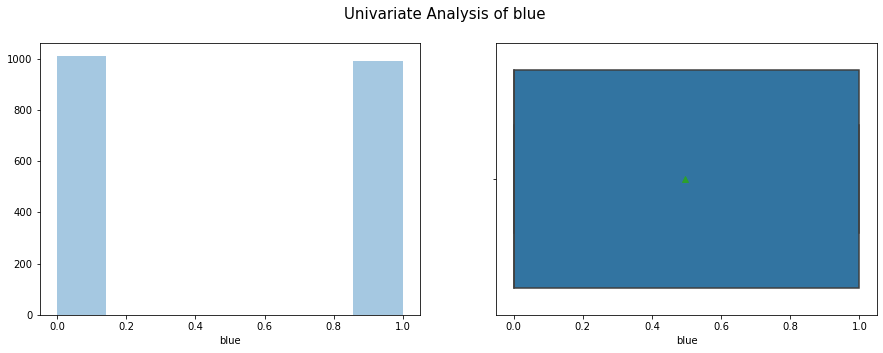

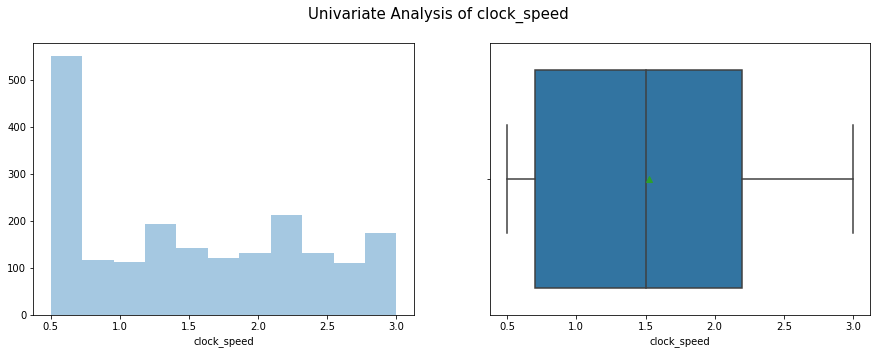

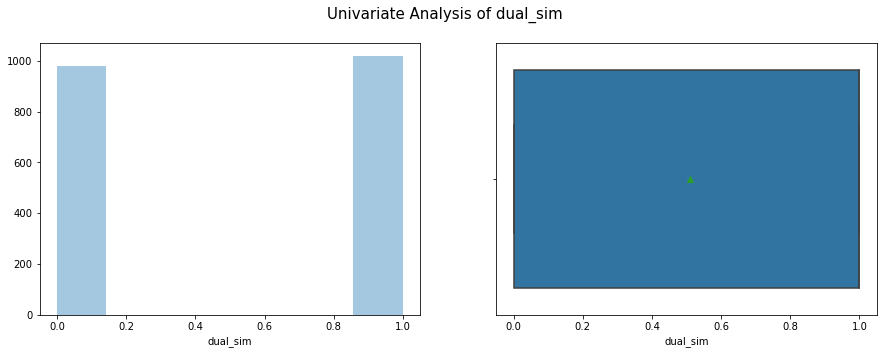

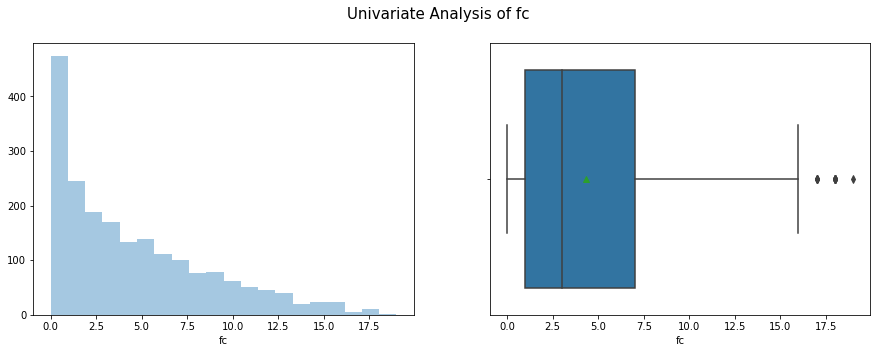

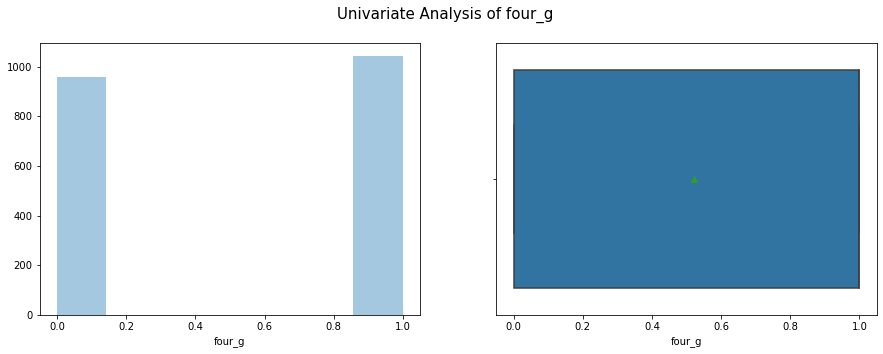

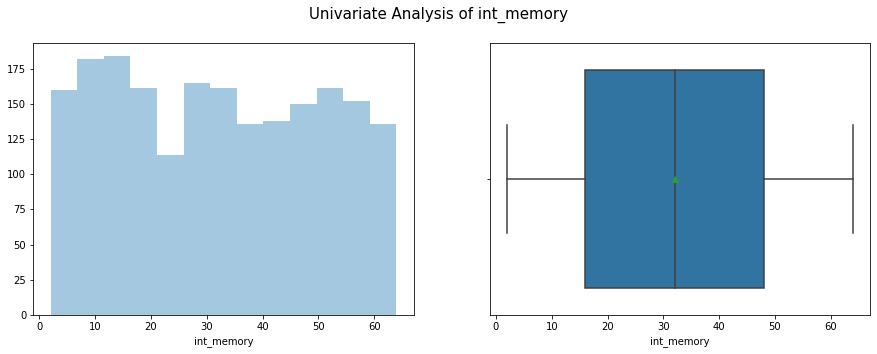

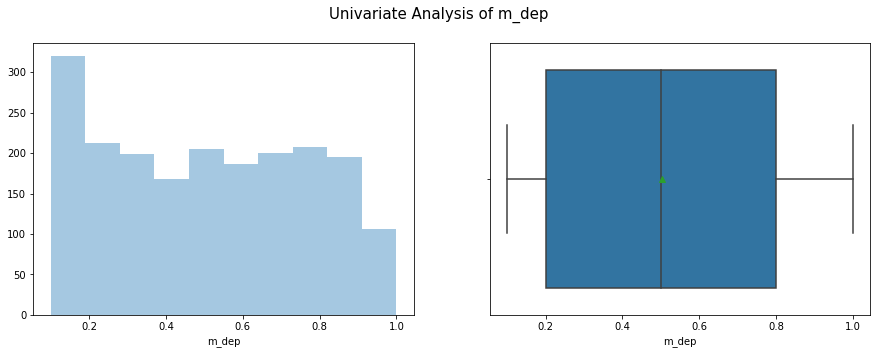

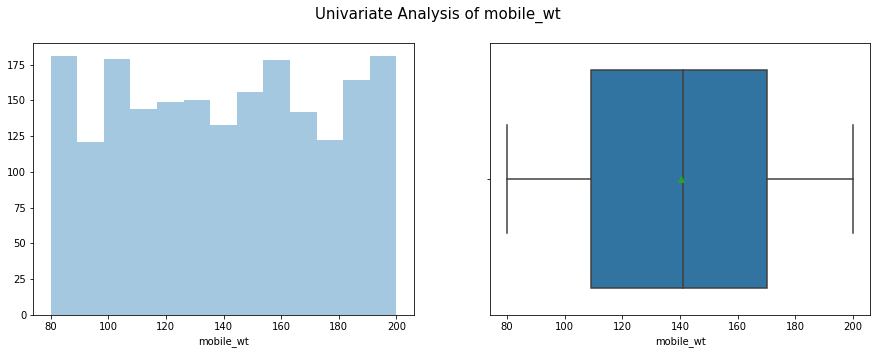

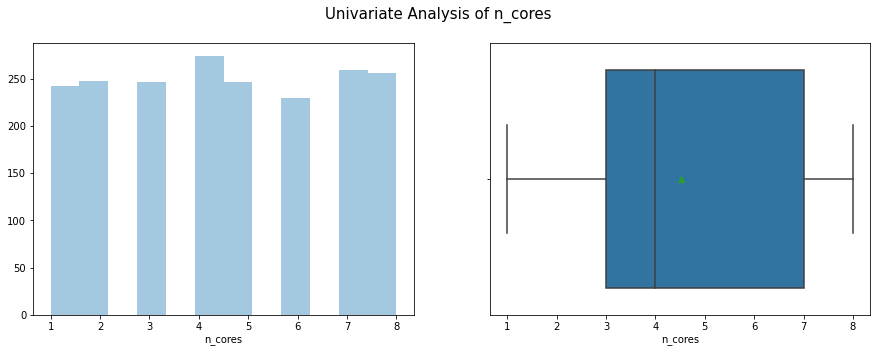

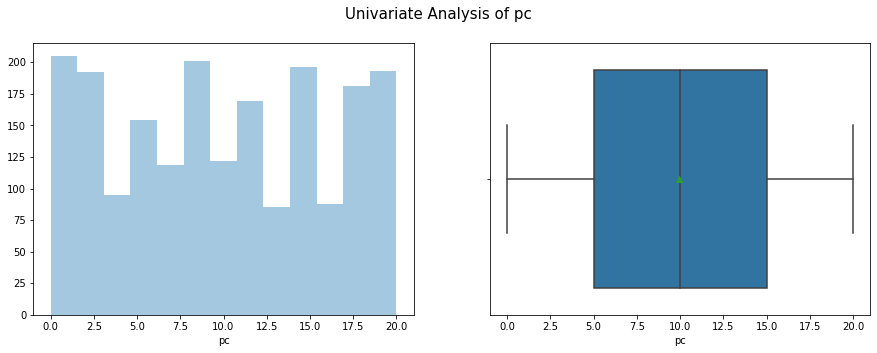

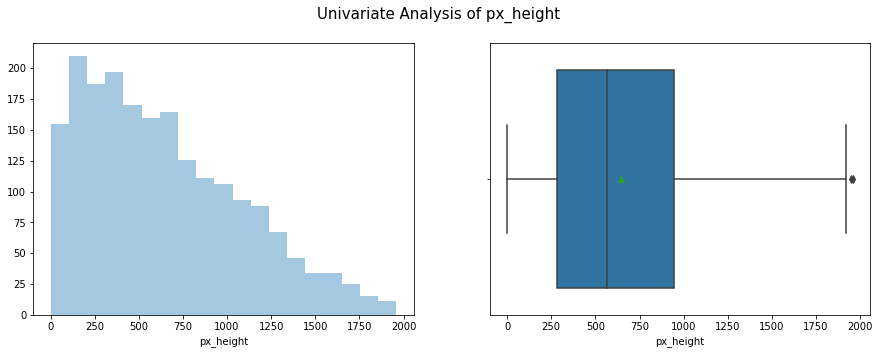

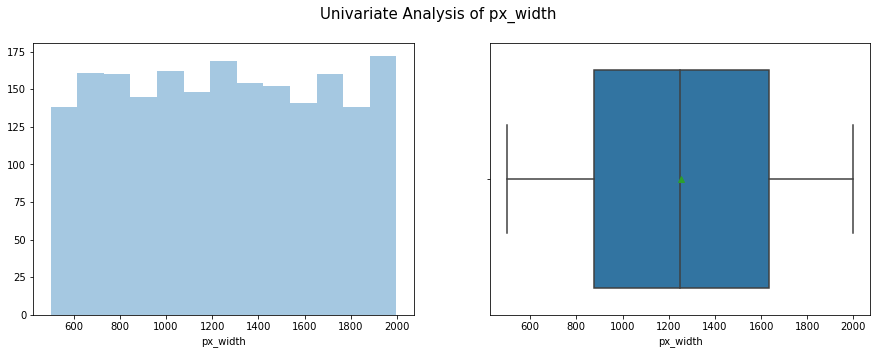

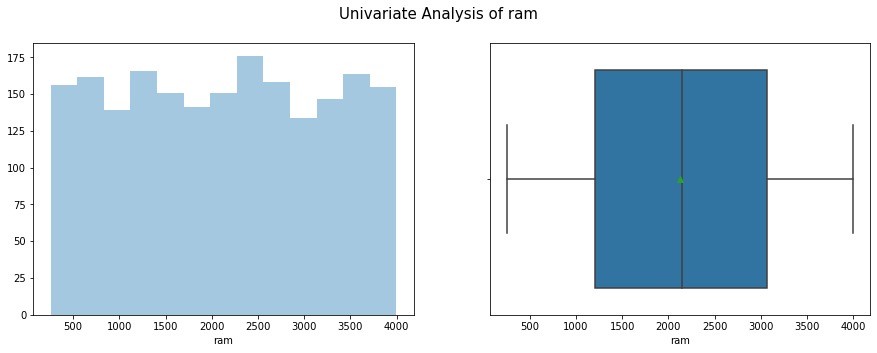

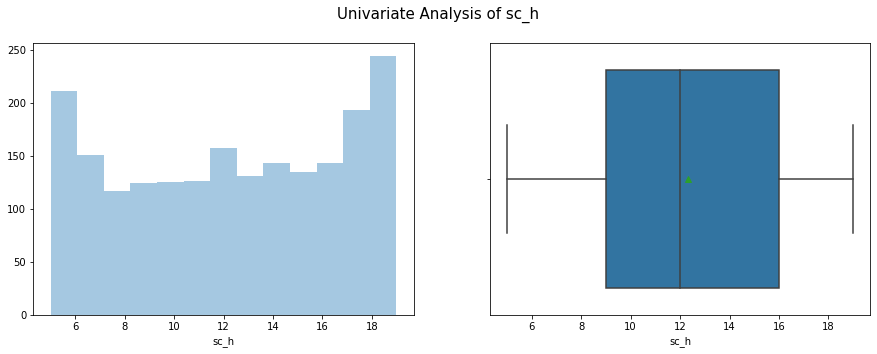

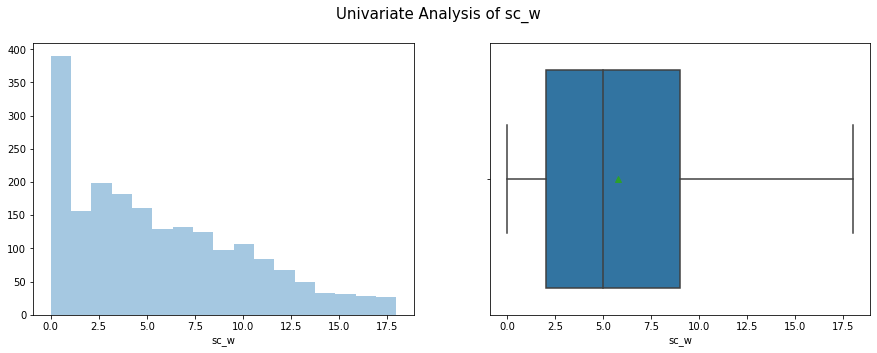

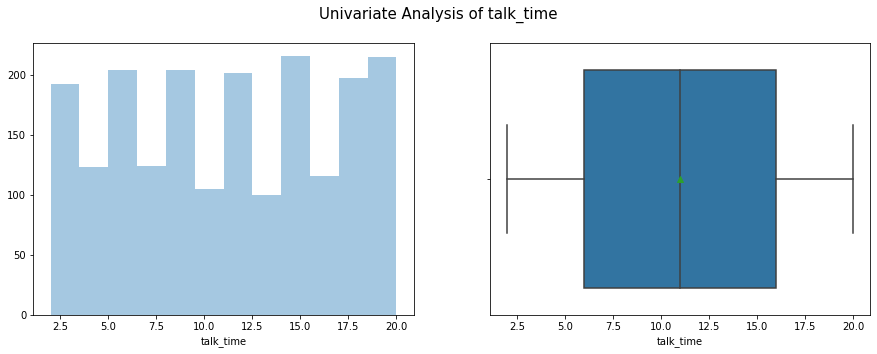

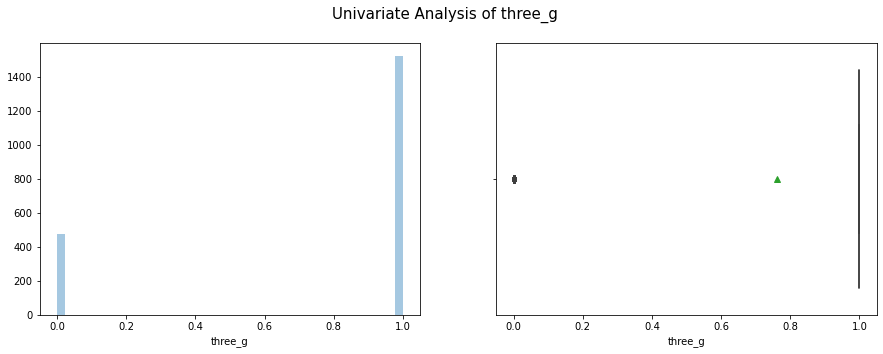

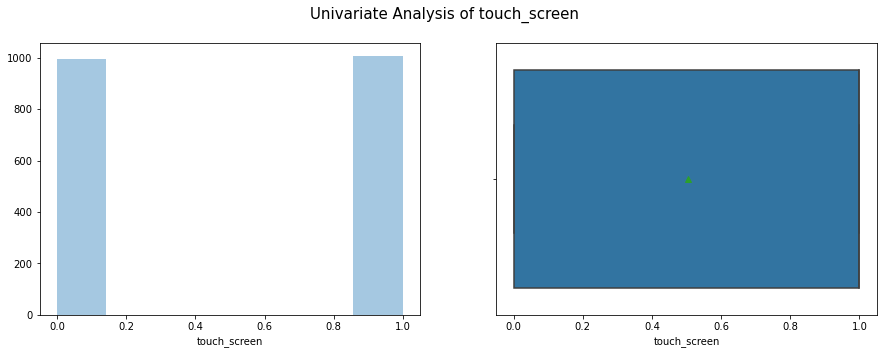

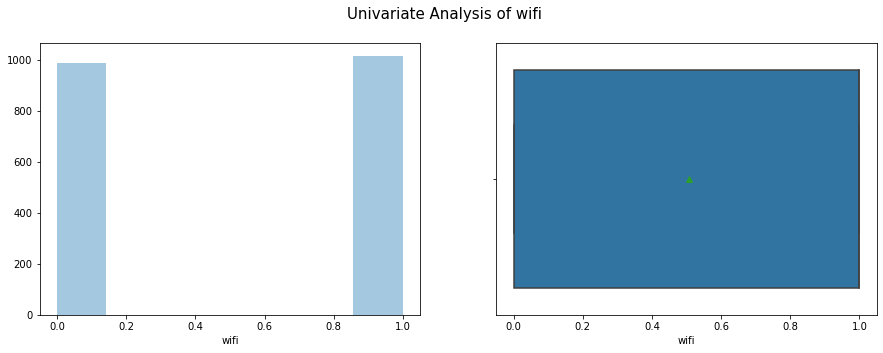

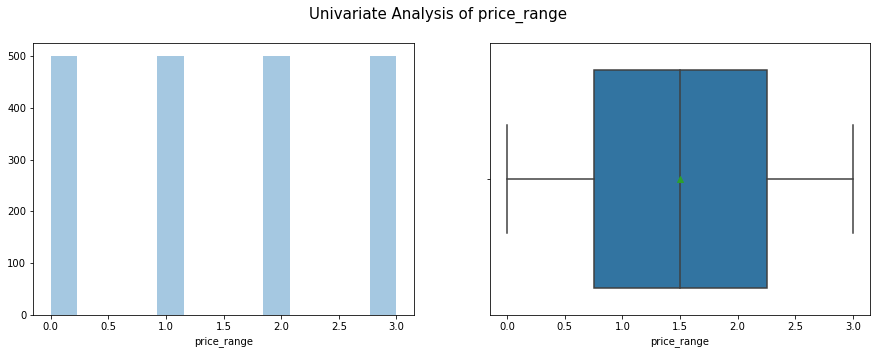

In [11]:
x_axis = ["battery_power","blue", "clock_speed","dual_sim","fc","four_g", "int_memory", "m_dep","mobile_wt","n_cores","pc","px_height",
                "px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi","price_range"]
for col in x_axis:
    plot(col, indata=df)

# Bivariate Analysis

In [12]:
def scatterplot(x,y,indata):
    plt.scatter(x=x, y=y, data = indata)
    plt.xlabel(x,fontsize=15)
    plt.ylabel(y,fontsize=15)
    plt.grid()
    plt.show()

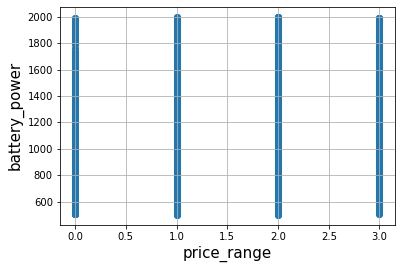

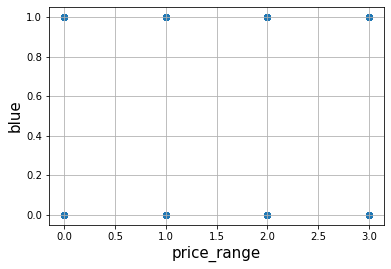

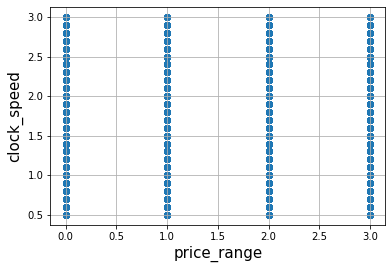

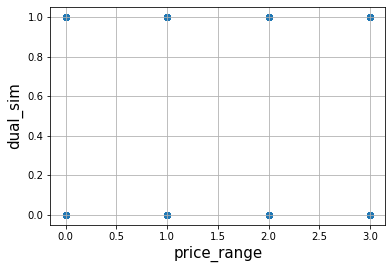

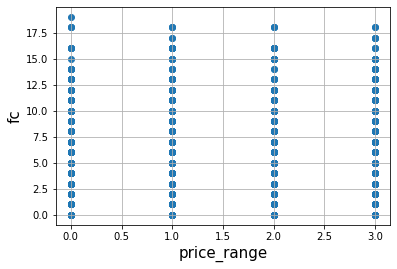

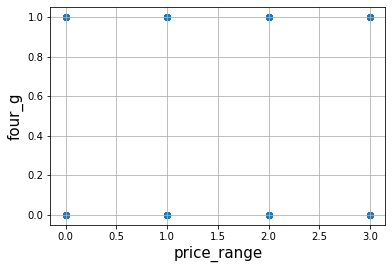

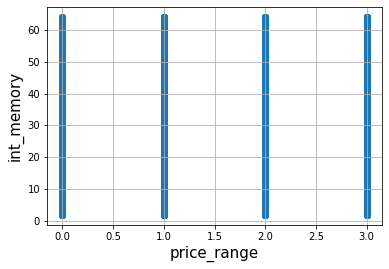

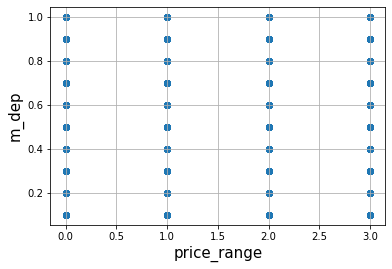

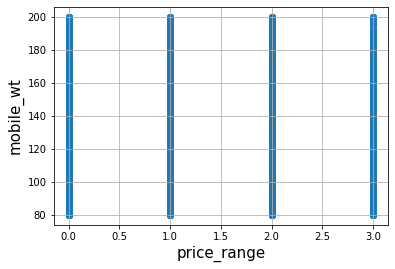

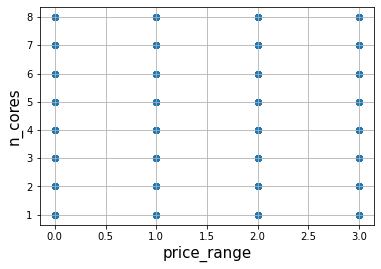

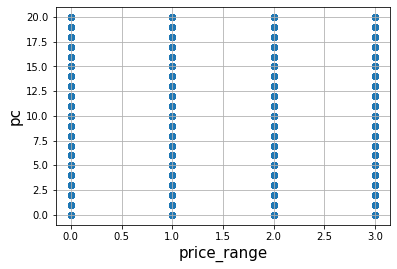

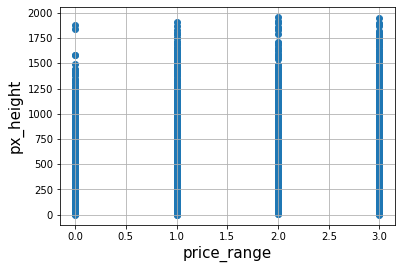

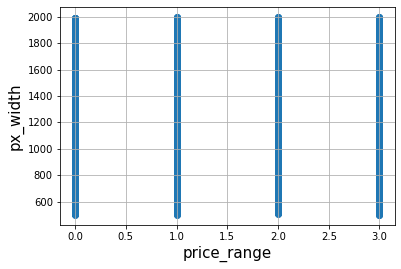

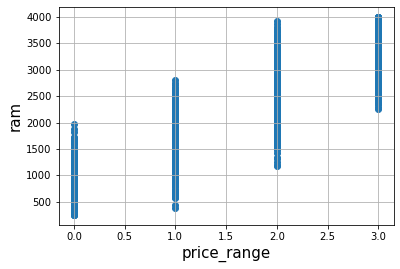

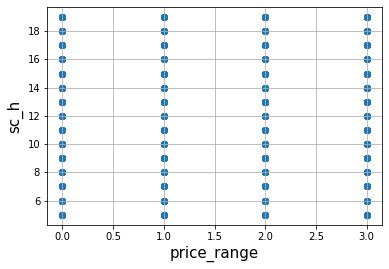

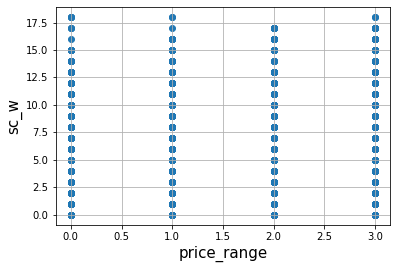

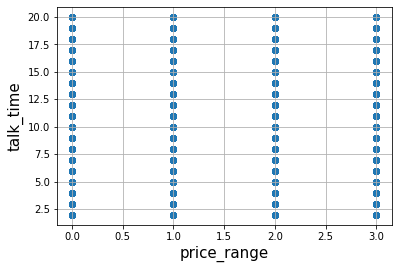

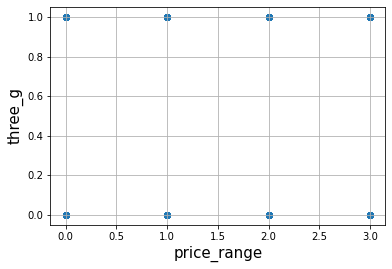

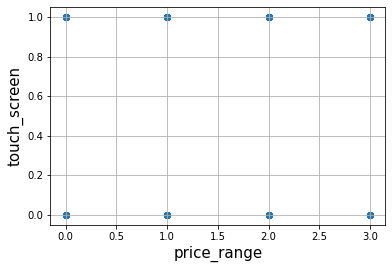

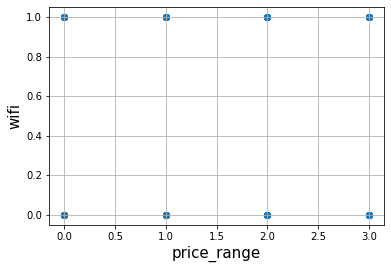

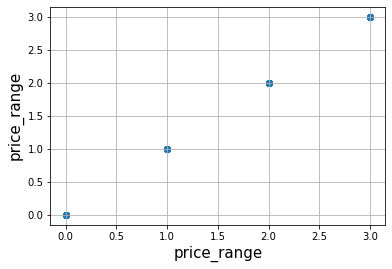

In [13]:
x_axis = ["battery_power","blue", "clock_speed","dual_sim","fc","four_g", "int_memory", "m_dep","mobile_wt","n_cores","pc","px_height",
                "px_width","ram","sc_h","sc_w","talk_time","three_g","touch_screen","wifi","price_range"]
y_axis = "price_range"
for col in x_axis:
    scatterplot(y=col,x=y_axis, indata=df)

# Insights : 
 Only Variable ram have signficant difference with price_range.<br>
 Also we can see it ram vs price_range by using chi square test.

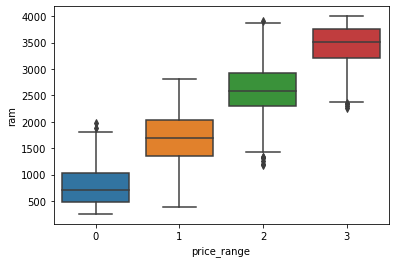

In [14]:
# also we can it by using boxplot.
sns.boxplot(x ="price_range", y = "ram", data=df)

In [15]:
numerical = ["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","pc","px_height","px_width",
             "ram","sc_h","sc_w","talk_time"]
categorical = ["blue","dual_sim","four_g","n_cores", "three_g","touch_screen","wifi"]


# Insights : 
Divide Continuous and Categorical variable because Correlation does not work with Categorical variable.<br>
<font color = "brown">For Categorical variable : Chi Square test.<br>
For Continuous variable : Correlation.


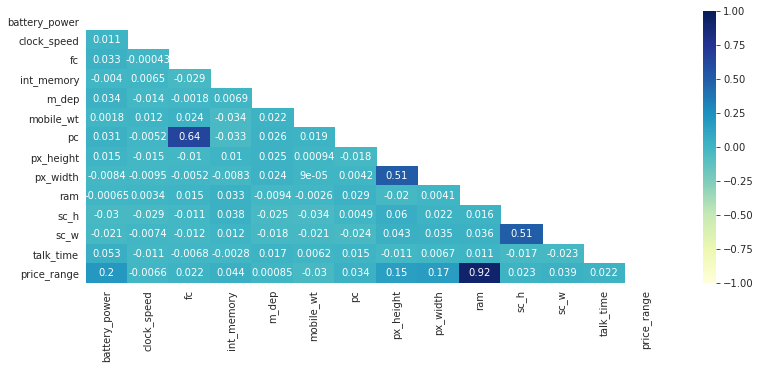

In [16]:
num_cor = df[numerical +["price_range"]].corr()
mask = np.zeros_like(num_cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,5))
    ax = sns.heatmap(num_cor, mask=mask, vmin = -1, vmax=1, annot = True, cmap="YlGnBu")


# Insights : <br>
Mobile Price is dependent in order to ram, battery_power, px_width, px_height. 

In [17]:
df["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

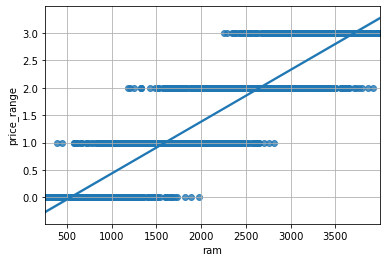

In [18]:
sns.regplot(x=df["ram"],y=df["price_range"])
plt.grid()

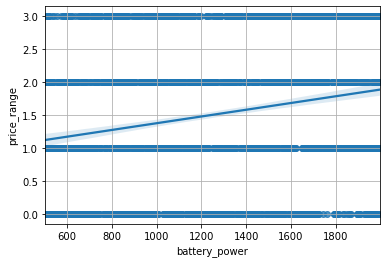

In [19]:
sns.regplot(x=df["battery_power"],y=df["price_range"])
plt.grid()

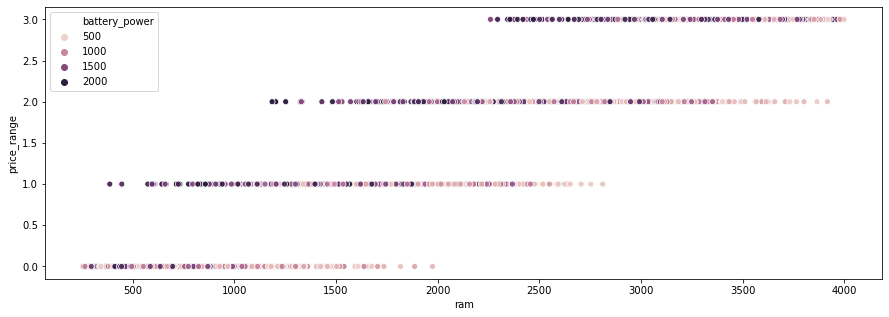

In [20]:
plt.figure(figsize=(15,5)),
sns.scatterplot(x=df["ram"] , y=df["price_range"] , hue=df['battery_power'] )

Text(0, 0.5, 'battery_power')

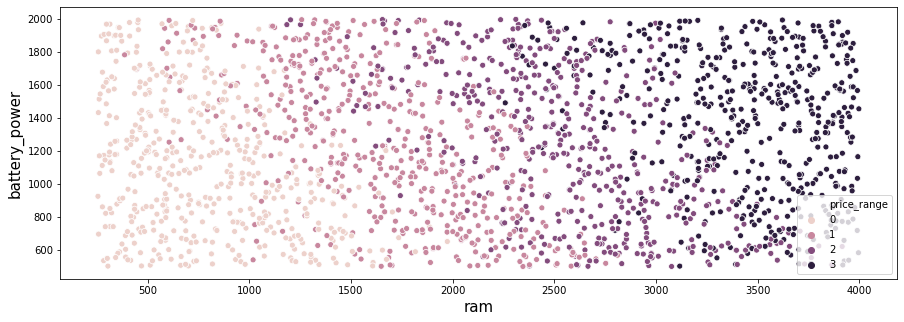

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df["ram"] , y=df["battery_power"] , hue=df['price_range'] )
plt.xlabel("ram", fontsize=15)
plt.ylabel("battery_power",fontsize=15)

# insights : 
Above scatter plot evaluate the hole dataset.<br>
Means if ram size increases then price will also increase.

# Model-1 : Random Forest with all Variables

In [22]:
#X = df[["ram","battery_power","px_width"]]
X = df.drop("price_range",axis=1)
y = df[["price_range"]]

#sc = StandardScaler()
#X = sc.fit_transform(X_in)
#X = pd.DataFrame(X, columns= X_in.columns)
#X.head()

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 100)

Accuracy on train data 91.1875
Accuracy on test data 80.25


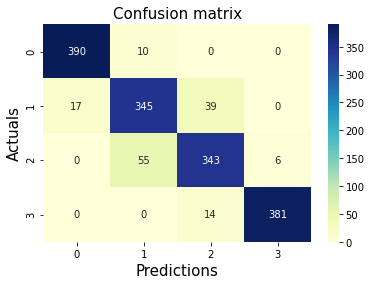

In [24]:
RF = RandomForestClassifier(max_depth = 5) 
RF = RF.fit(X_train,y_train)

#y_train_pred = RF.predict(X_train)
#y_test_pred = RF.predict(X_test)
#accuracy_score(y_train,y_train_pred)
#accuracy_score(y_test,y_test_pred)
train_acc, test_acc = Accuracy_confusion(model = RF)

Text(0, 0.5, 'Percentage')

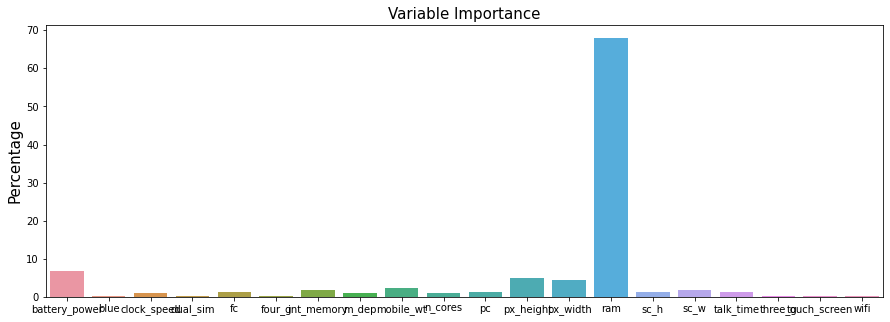

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(X_train.columns.tolist(),RF.feature_importances_*100)
plt.title("Variable Importance", fontsize = 15)
plt.ylabel("Percentage", fontsize=15)


# Model - 2 : Randon Forest with Top 3 Variables

In [27]:
X = df[["ram", "battery_power","px_width"]]
y = df[["price_range"]]

Accuracy on train data 86.0625
Accuracy on test data 82.5


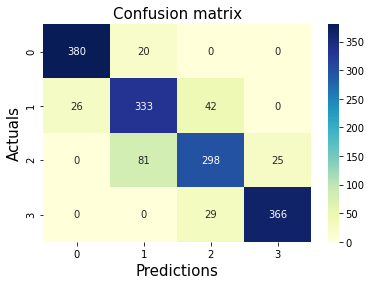

In [35]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 100)
RF = RandomForestClassifier(max_depth = 4) 
RF = RF.fit(X_train,y_train)
train_acc, test_acc = Accuracy_confusion(model = RF)

# Model-3 : KNN

Accuracy on train data 90.5625
Accuracy on test data 88.0


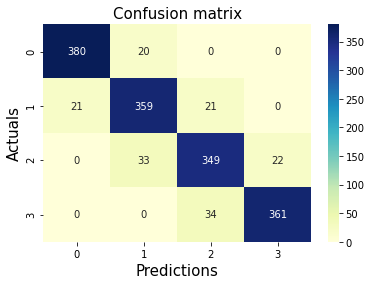

In [39]:
KN = KNeighborsClassifier(n_neighbors=10)
KN = KN.fit(X_train,y_train)
train_acc, test_acc = Accuracy_confusion(model = KN)

# Model - 4 :  Decision Tree

Accuracy on train data 83.5625
Accuracy on test data 80.5


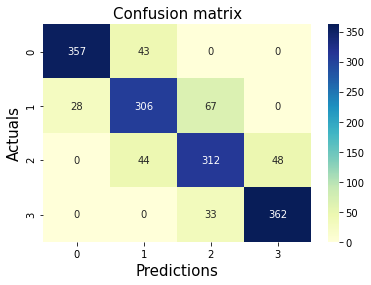

In [47]:
dt = DecisionTreeClassifier(max_depth = 4) 
dt = dt.fit(X_train,y_train)
train_acc, test_acc = Accuracy_confusion(model = dt)

# Model - 5 : Logistic Regression

Accuracy on train data 89.0
Accuracy on test data 91.0


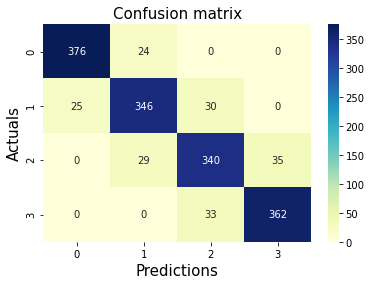

In [48]:
LR = LogisticRegression() 
LR = LR.fit(X_train,y_train)
train_acc, test_acc = Accuracy_confusion(model = LR)

# Result : <br>
<font color = "green"> The Logistic Regression perform better than others for train and test data.